In [1]:
import seaborn as sns
from seaborn import lmplot
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
df = pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
subset= df.head(40)
df.shape
df.columns

df.describe().round(3)
df.mean()

<ipython-input-3-825eae8c089a>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

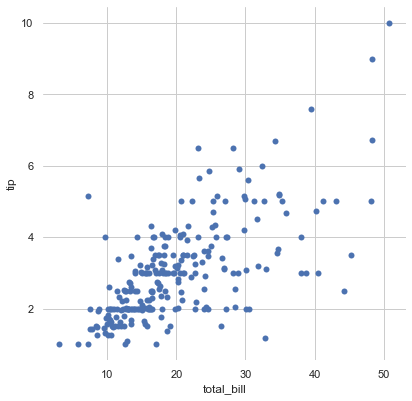

In [4]:
#EXPLORING BIVARIATE VARIABLES WITH SCATTERPLOTS
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="total_bill", y="tip",
               
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)


In [5]:
#Podem observar com a mida que el compte augmenta de preu, la propina també ho fa a parts proporcionals. Així doncs,
#com més alt és el preu a pagar, més propina acostumen a deixar els clients.

<AxesSubplot:xlabel='size', ylabel='tip'>

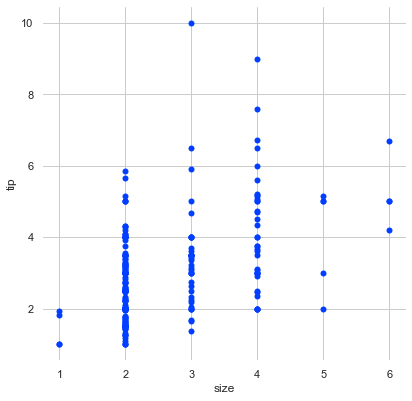

In [6]:
sns.set_theme(style="whitegrid", palette="bright")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="size", y="tip",
               
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

In [ ]:
#En general, com més persones hi ha més propina deixen, però menys vegades. Per exemple quan van dues persones deixen
#un pèl menys de propina però sempre que es repeteix el patró que sigui el nombre de dues les persones que prenen part
#de l'àpat deixen en més ocasions propina que no pas si van més persones. 

<AxesSubplot:xlabel='day', ylabel='tip'>

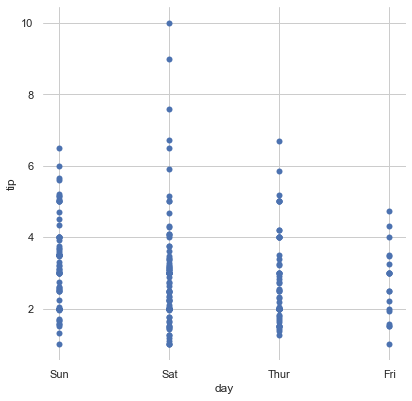

In [7]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="day", y="tip",
               
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

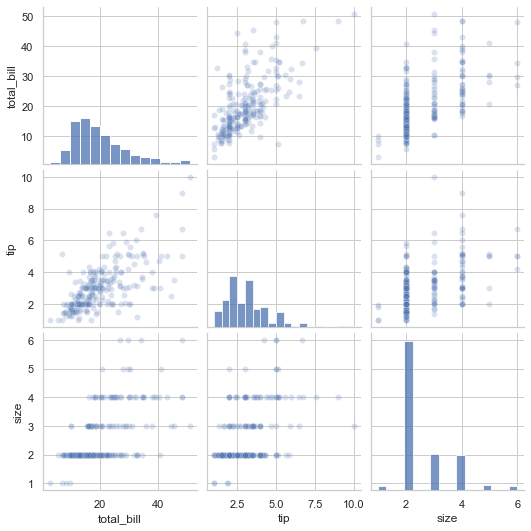

In [8]:
sns.pairplot(df, diag_kind='hist', plot_kws={'alpha': 0.2})

<AxesSubplot:xlabel='tip', ylabel='Count'>

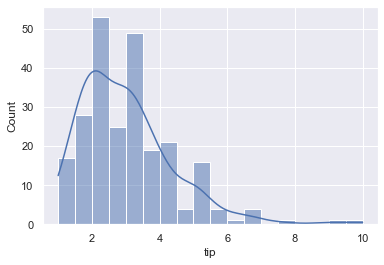

In [9]:
#fer histograma d'algo

sns.set(style="darkgrid")
sns.histplot(data=df, x="tip", kde=True)


In [ ]:
#Podem observar com les dades de les propines estan bastant sesgades cap a la dreta. Això vol dir que la majoria de
#vegades que la gent dona propina ho fa en valors baixos en contrast amb el més alt que s'ha registrat.
#El nombre de vegades que es dóna un valor de propina va disminuint a mida que augmenta el valor de la mateixa. 

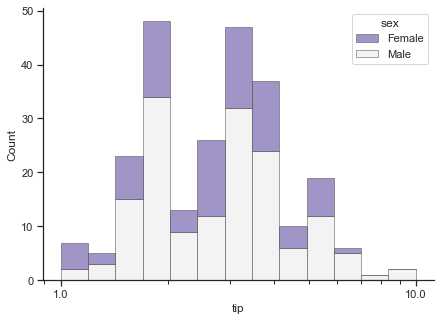

In [13]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="tip", hue="sex",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())


In [ ]:
# Els homes han donat propines bastants més cops en general. Però a mida que va augmentant la quantitat de propina, 
#els grups s'equilibren i elles donen més.

<AxesSubplot:xlabel='smoker', ylabel='tip'>

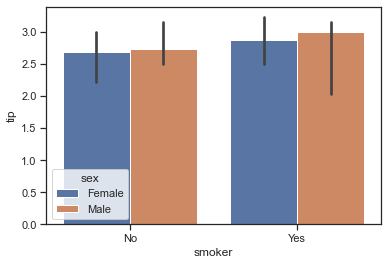

In [14]:
sns.barplot(x='smoker', y='tip', hue='sex', data=df, estimator=np.median)

In [ ]:
#La mitjana de dones que no fumen donen menys propina que els homes que també tenen aquest vici. Curiosament, els homes
#que fumen acostumen a donar més propines que les donen que també ho fan. 

In [12]:
df.tip.iloc[[1], ]
df.tip.std()
ordenat= subset['tip'].sort_values()

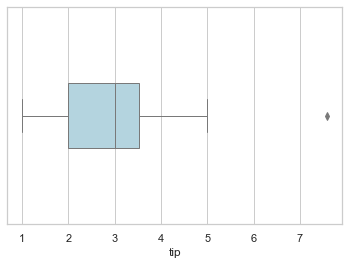

In [15]:
#BOXPLOT

sns.set(style="whitegrid")
ax = sns.boxplot(x=ordenat, color='lightblue', fliersize=5,  orient='h', linewidth=1 , width=0.3)


In [46]:
#asimetria positiva, bigotis gairebé identics i només un valor atípic. Podem veure on està el gruix del valor de les 
#propines es troba entre 2 i 3.5 essent la mediana tres i haven més gruiz en el primer quartil.

<AxesSubplot:xlabel='tip'>

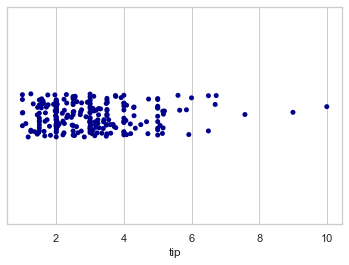

In [16]:
sns.stripplot(x=df["tip"], orient='h', color='darkblue')

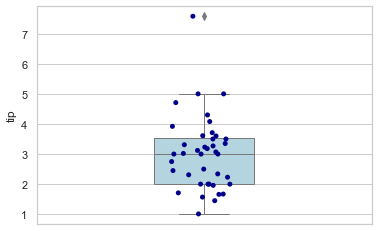

In [17]:
ax = sns.boxplot(y="tip", data=subset,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=subset["tip"], orient='v', color='darkblue')

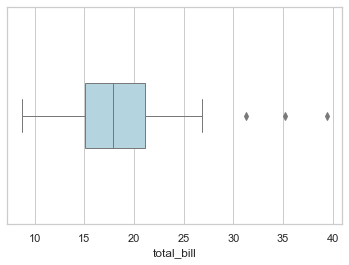

In [18]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=subset["total_bill"], color='lightblue', fliersize=5,  orient='h', linewidth=1 , width=0.3)

<AxesSubplot:xlabel='tip'>

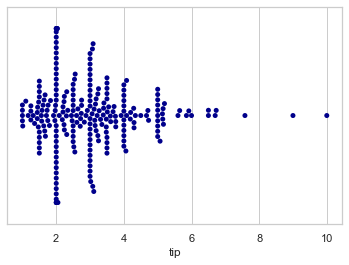

In [19]:
sns.swarmplot(x=df["tip"], orient='h', color='darkblue')

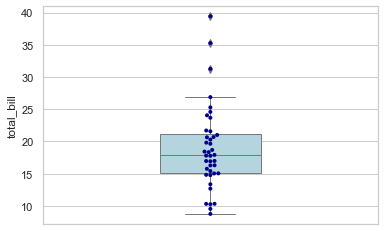

In [20]:
ax = sns.boxplot(y="total_bill", data=subset,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.swarmplot(y="total_bill", data=subset, color="darkblue", orient="v", size=4)

In [21]:
df.tip.mean()- df.tip.std()


1.6146404995234076

In [22]:
df.total_bill.std()
#És prou important el valor de la std del total_bill ja que s'allunya bastant en molts casos de la mijtana d preu x pax.

8.902411954856856

In [23]:
#Primer calculen les deviations.
aa= df.tip.iloc[[1], ]
print(aa)
#Poca distancia amb la mitjana 

1    1.66
Name: tip, dtype: float64


In [24]:
aaa= df.tip.iloc[[2], ]
print(aaa)
#Pels valors petits amb els que treballem en les tips és bastant la diferencia

2    3.5
Name: tip, dtype: float64


In [25]:
b= df.tip.iloc[[3], ]
print(b)
#Bastant diferència

3    3.31
Name: tip, dtype: float64


In [26]:
c= df.tip.iloc[[4], ]
print(c)
#Bastant diferència

4    3.61
Name: tip, dtype: float64


In [27]:
d= df.tip.iloc[[5], ]
print((d))
#Molta diferència amb la mitjana

5    4.71
Name: tip, dtype: float64


In [28]:
e =df.tip.iloc[[6], ]
print(e)
#Poca distància amb la mitjana. 

6    2.0
Name: tip, dtype: float64


In [29]:
#Si elevem al quadrat els valors de cada deviation i ho dividim entre el nombre de deviations - 1 obtindrem la variance.

variance= (1.66**2 + 3.5**2+ 3.31**2+ 3.61**2+ 4.71**2+2.0**2)/5
print(variance)
import math
std= math.sqrt(variance)
print(std)

#Es calcula la variance que és la distancia mitjana elevada al quadrat sobre la mitja de les observacions.
#S'eleva al quadrat pero obtenir resultats més grans i a més evitar valors negatius. 
# I la Standard Deviation calcula cada valor com de lluny està de la mitja de les observacions

13.03558
3.6104819622870297


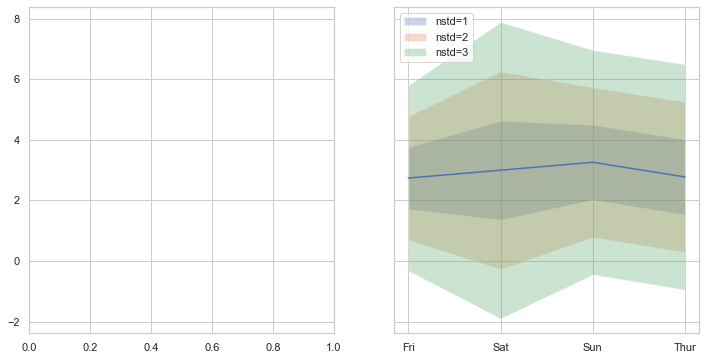

In [31]:
fig,axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

nstd = 1.
means = df.groupby("day")["tip"].mean()
stds = df.groupby("day")["tip"].std()
axs[1].plot(means.index, means.values)
for nstd in range(1, 4):
    axs[1].fill_between(means.index, (means - nstd*stds).values, (means + nstd*stds).values, alpha=0.3, label="nstd={}".format(nstd))
axs[1].legend(loc="upper left")


In [ ]:
# Podem observar com la dispersió d'aquest subconjunt augmenta els dies amb més activitat com acostuma ser el cap de 
#setmana i en aquest cas dissabte i diumenge. 

       total_bill                 tip                size          
             mean       std      mean       std      mean       std
time                                                               
Dinner  20.797159  9.142029  3.102670  1.436243  2.630682  0.910241
Lunch   17.168676  7.713882  2.728088  1.205345  2.411765  1.040024


<AxesSubplot:title={'center':'Average Tips'}, ylabel='time'>

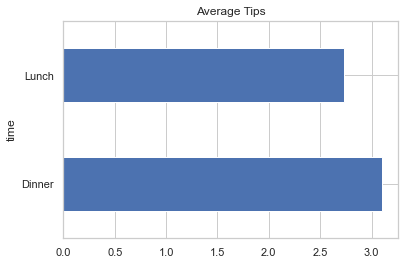

In [34]:
df_tip4 = df.groupby("time").agg([np.mean, np.std])
print(df_tip4)

tips4 = df_tip4['tip'] 
  
tips4.head()
tips4.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Tips")

In [ ]:
# En aquest gràfic de barres, agrupem les propines segons si és l'hora de dinar o de sopar per veure'n els resultats
# i analitzar en quina franja horària la gent està més disposada a desembutxacar-se quelcom més pel tracte rebut.

# La dispersió és més gran a l'hora de sopar. Per tant, es cobraran més propines per la nit i estaran més allunyades
# de la mitjana per tant seran més grans. 

       total_bill                 tip                size          
             mean       std      mean       std      mean       std
sex                                                                
Female  18.056897  8.009209  2.833448  1.159495  2.459770  0.937644
Male    20.744076  9.246469  3.089618  1.489102  2.630573  0.955997


<AxesSubplot:title={'center':'Average Tips'}, ylabel='sex'>

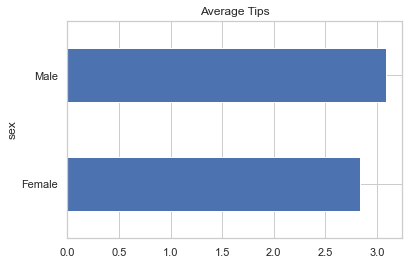

In [35]:
df_tip2 = df.groupby("sex").agg([np.mean, np.std])
print(df_tip2)

tips2 = df_tip2['tip'] 
  
tips2.head()
tips2.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Tips")

In [ ]:
# Les dones tenen una desviació estàndar menor en la mitjana de propines de les dades que es recullen, no estaran tan 
# allunyades de la mitjana i és possible que en donin menys en general, com hem pogut veure en altres gràfiques. 
# Tot i que al recollir més dades d'homes que de dones també poden estar una mica sesgats els resultats. 

     total_bill                 tip          
           mean       std      mean       std
size                                         
1      7.242500  3.010729  1.437500  0.506516
2     16.448013  6.043729  2.582308  0.985501
3     23.277632  9.407065  3.393158  1.557344
4     28.613514  8.608603  4.135405  1.640668
5     30.068000  7.340396  4.028000  1.440111
6     34.830000  9.382000  5.225000  1.053170


<AxesSubplot:title={'center':'Average Tips'}, ylabel='size'>

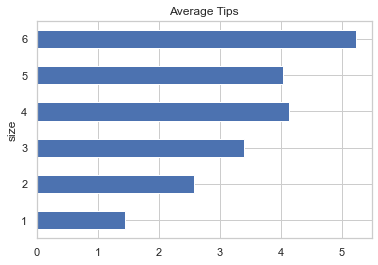

In [36]:
df_tip3 = df.groupby("size").agg([np.mean, np.std])
print(df_tip3)

tips3 = df_tip3['tip'] 
  
tips3.head()
tips3.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Tips")

In [ ]:
#Aquesta gràfica pot ser enganyosa ja que s'agafen moltes menys mostres de grups més grans a partir de 4 persones,
# és normal que donin més propines perquè són més gent però, és clar, s'agafen menys resultats per tant és molt més 
# probable que s'obtinguin resultats molt més abultats. Tot i així, és una tendència creixent, com més pax per taula, 
# més propina deixen.

(array([  4.,   0.,   0.,   0.,   0., 156.,   0.,   0.,   0.,   0.,  38.,
          0.,   0.,   0.,   0.,  37.,   0.,   0.,   0.,   0.,   5.,   0.,
          0.,   0.,   4.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. ]),
 <BarContainer object of 25 artists>)

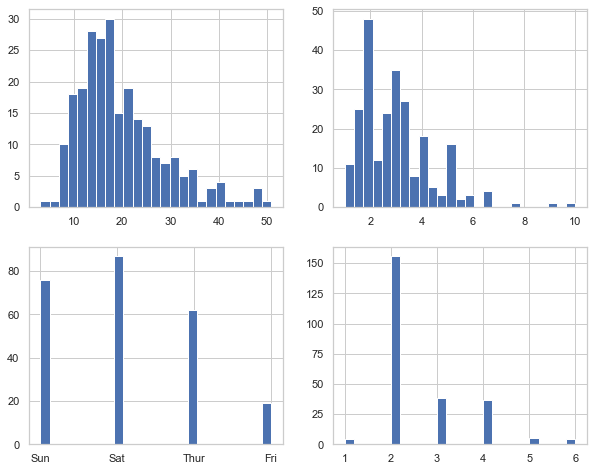

In [37]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(df['total_bill'], bins=25)
ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(df['tip'], bins=25)
ax3 = fig.add_subplot(2, 2, 3)

ax3.hist(df['day'], bins=25)
ax4 = fig.add_subplot(2,2,4)
ax4.hist(df['size'], bins=25)


In [ ]:
#Histogrames de les mateixes interpretacions de la standard variation. Podem veure que les dues primeres gràfiques
# s'assemblen perquè com hem vingut dient, és prou proporcional la quantitat que es paga al compte amb la propina 
# que es deixa. Els caps de setmana se sol deixar més propina perqué menges més relaxat i estàs més empàtic. 
# I al contrari que abans, ara no veiem la mitjana, sino les vegades que es dona propina en l'última gràfica i 
# es veu clar que les vegades que es dona més propina són 2 persones ja que és el nombre més habitual. 

In [38]:
#Exercici ScatterPlot

df['tip_pct'] = round((df['tip'] / (df['total_bill'] - df['tip']))*100, 2)
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21
5,25.29,4.71,Male,No,Sun,Dinner,4,22.89
6,8.77,2.00,Male,No,Sun,Dinner,2,29.54
7,26.88,3.12,Male,No,Sun,Dinner,4,13.13
8,15.04,1.96,Male,No,Sun,Dinner,2,14.98
9,14.78,3.23,Male,No,Sun,Dinner,2,27.97


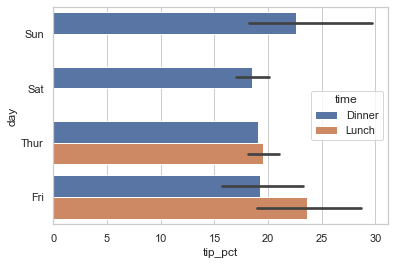

In [45]:
sns.barplot(x=df['tip_pct'], y=df['day'], hue=df['time'], data=df, orient='h')
plt.show()
sns.set(style="darkgrid")


In [ ]:
#Diagrama d'error.

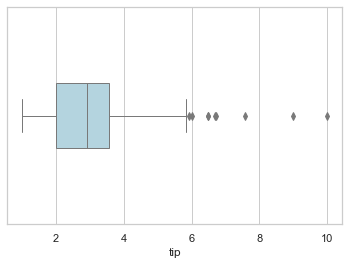

In [40]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = df['tip'], color='lightblue', fliersize=5, orient='h', linewidth=1, width=0.3)


In [ ]:
# La linia vertical que parteix el boxplot blau és la mediana. 
#El costat de l'esquerra representaria el quartil tercer en un bloxpot vertical. El costat de la dreta seria el
# primer quartil. La resta seria la mida del quartil. El rang també és un indicador per medir el grau de divergència 
# entre les dades. El límit superior i inferior són línies 1.5 vegades el rang entre quartils de la mitjana. 
# Les dades per damun del límit superior o inferior són dades atípiques. 


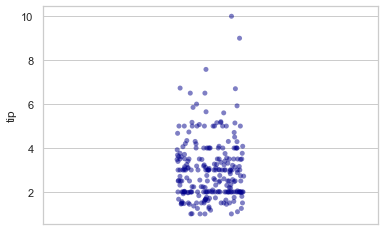

In [41]:
ax = sns.stripplot(y=df["tip"], orient='v', color='darkblue', alpha= 0.5)


In [ ]:
# Un altre exemple de com es concentren les propines en valors baixos si tenim en compte la quantitat de la mateixa 
# que ha sigut recullida. N'hi ha de menys nombre que siguin més altes .

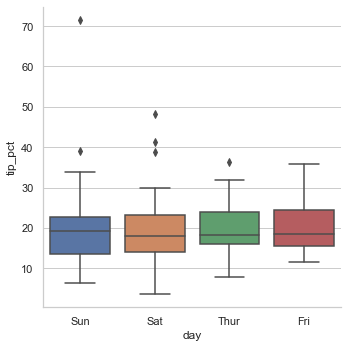

In [42]:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=df[df.tip_pct < 245]);

In [ ]:
# Els valors es concentren entre 12 i 22. Asimetría negativa o sesgada a la izquierda. La mitja es menor que la mitjana. Hi ha un rang més ampli en el costat inferior però 
# no té perquè haver més dades sobre les tips.Els bigotis estan correctes perquè no son 1.5 cops més gran que el rang
# entre quartils, però té un valor atípic que sí sobrepassa

# Els valors es concentren entre 13 i 23. Asimetria positiva a la dreta. La mitja es major que la mitjana.Bigotis normals,
# no sobrepassen el límit, però en el superior hi ha diversos valors atípics, sobretot al ser dissabte, que superen 
# la distancia normal entre quartils

# En aquest cas es concentra el valor del tip_pct entre 16 i 24. Més concentrat que les anteriors però amb una asimetria
# positiva molt marcada. Els bigotis són de la mateixa llargada pràcticament i només troben un valor atípic. 

# Valors entre 15 i 25. Una forquilla més gran però amb una asimetria positiva gairebé igual de marcada que en l'anterior.
# La mitja és major que la mitjana i en aquest cas el bigoti superior és més llarg que l'inferior però és la única
# casuística que no té valors atípics. 


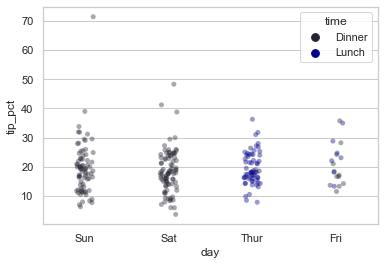

In [43]:
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=df[df.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);


In [ ]:
# Molts més sopars que dinars. La major concentració de tip_pct és al cap de setmana per sopar com vèiem en les últimes
# tendències. 

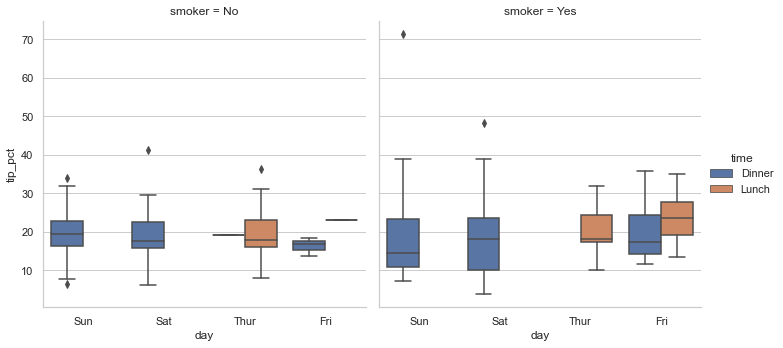

In [44]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=df[df.tip_pct < 245]);

In [ ]:
# En el primer gràfic de no fumadors hi ha una tendència de asimetria positiva tant dijous per dinar com dissabte al sopar
# amb uns valors molt similars i els bigotis de la mateixa llargada pràcticament. Amb un valor atípic cadascú, essent el 
# dissabte el dia on romandria el valor més alt. Diumenge és completament simètric tant el boxplot com els bigotis.
# Amb un valor atípic superant cada límit pel seu cantó. 
 

# Divendres sopar es asimètricament negatiu, en un rang de valors molt baix de 16 a 18 més o menys, bigotis molt curts,
 
# sense valors atípics. 

# Pel que fa als fumadors, que són més, hi ha més rang de valors en general i disparitat de resultats. Els dies que 
# conformen el cap de setmana són semblants però diumenge asimètricament positiu, al contrari que dissabte. Bigoti inferior
# lleugerament més llarg dissabte. Valor atípic superior molt gran diumenge i no tan gran dissabte. Tot això per sopar.

# Dijous i divendres per dinar guarden similituts com el nombre en que es caracteritza el rang, essent el primer de 18 a 25
# i el segon de 19 a 27. Dijous molt positivament asimètric amb els bigotis de la mateixa mida i sense valors atípics.
# Divendres gariebé simètric i bigotis mateixa mida sense valors atípics.

# Divendres per sopar els valors oscil·len entre 14 i 24 sent lleugerament simètric positiu amb el bigoti superior molt 
# més llarg i sense valors atípics. 

# Per tant, tots els valors asimetricament positius és que n'hi ha molts més per sobre de la mitjana i si son negatius
# estaran per sota. Els bigotis delimiten el límit i els valors atípics surten de del límit de tres vegades la distancia 
# entre quartils. 